In [300]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [301]:
dataset = pd.read_csv('student_mental_health_dataset.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [302]:
dataset.head()


,age,gender,academic_performance,financial_stress,family_support,peer_support,exercise_frequency,hours_of_sleep,screen_time_hours,substance_use,academic_pressure,social_media_use,mental_health_support,diagnosed_mental_illness
0,24,Other,2.70,0,2,3,5,5.7,6.6,0,2,4,1,0
1,21,Female,3.87,1,5,1,3,7.8,1.7,0,9,1,1,1
2,22,Other,2.08,1,9,9,5,5.8,5.1,0,8,1,1,1
3,24,Other,2.84,1,9,8,2,7.1,4.4,0,3,2,0,1
4,20,Other,3.94,0,8,2,5,5.4,5.5,0,8,2,1,0


In [303]:
print(y)

[0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0
 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0
 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1
 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1
 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1
 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1
 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0
 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1
 1 1 0 1]


# Mean and Median values of each feature

In [304]:
del dataset['gender']
mean_values = dataset.mean()
median_values = dataset.median()

# Print mean and median values
print("Mean values of each feature:\n", mean_values)
print("\nMedian values of each feature:\n", median_values)

Mean values of each feature:
 age                         21.040000
academic_performance         3.005733
financial_stress             0.416667
family_support               5.496667
peer_support                 5.460000
exercise_frequency           3.390000
hours_of_sleep               7.014000
screen_time_hours            4.553667
substance_use                0.260000
academic_pressure            5.600000
social_media_use             2.990000
mental_health_support        0.486667
diagnosed_mental_illness     0.506667
dtype: float64

Median values of each feature:
 age                         21.000
academic_performance         3.025
financial_stress             0.000
family_support               5.000
peer_support                 6.000
exercise_frequency           3.000
hours_of_sleep               7.000
screen_time_hours            4.600
substance_use                0.000
academic_pressure            6.000
social_media_use             3.000
mental_health_support        0.000
diagnose

# Distribution of each feature

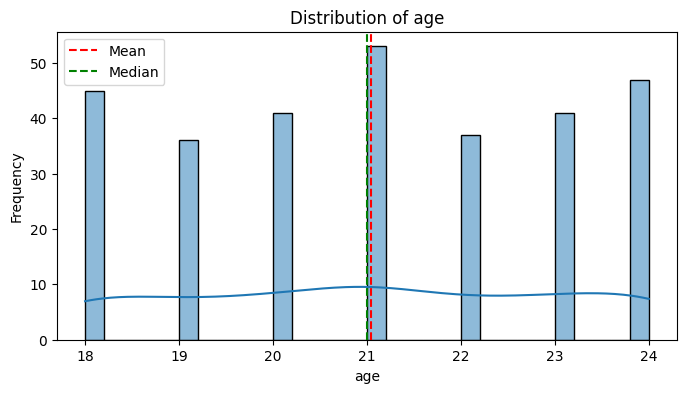

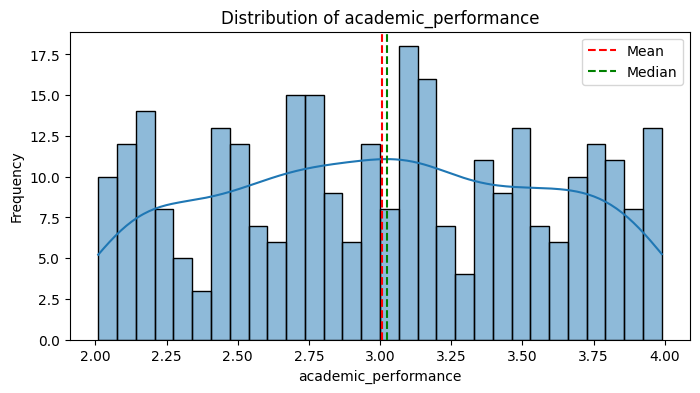

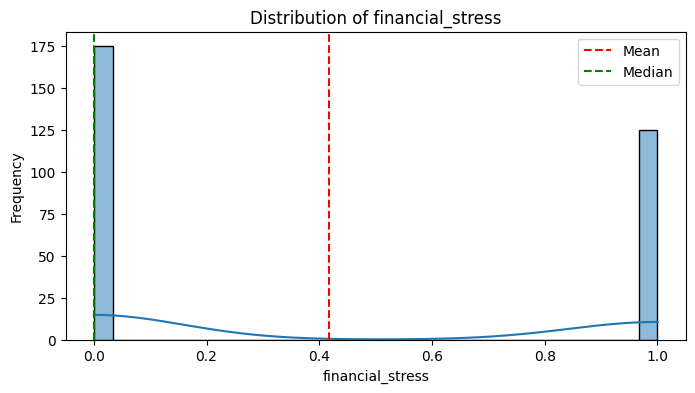

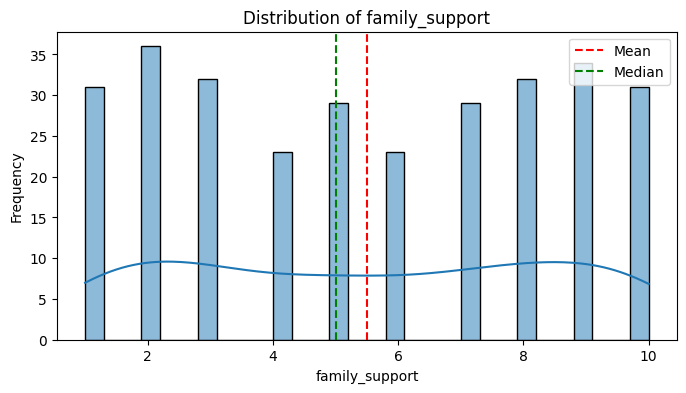

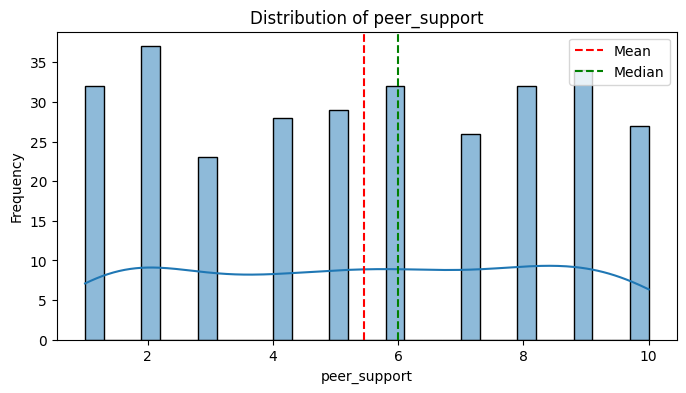

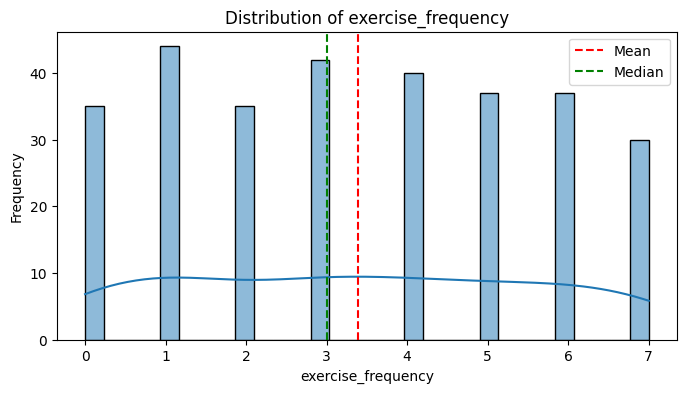

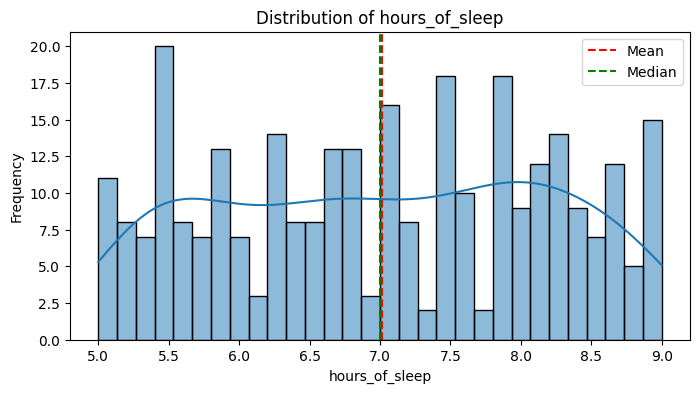

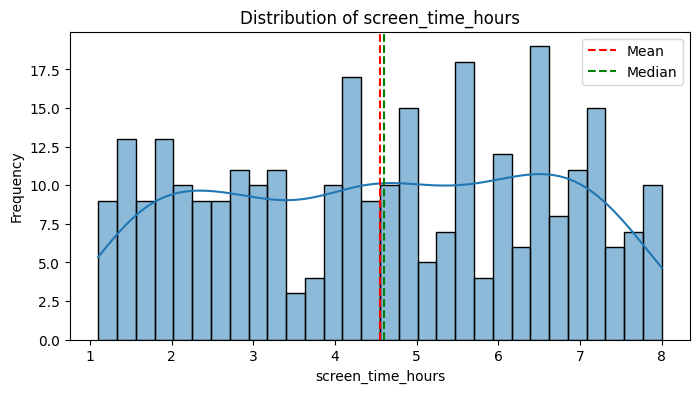

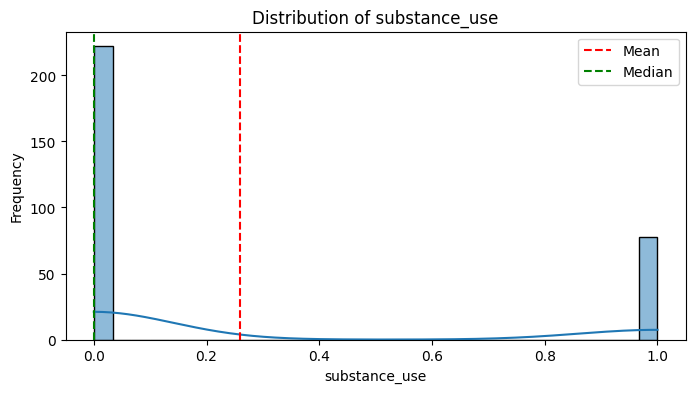

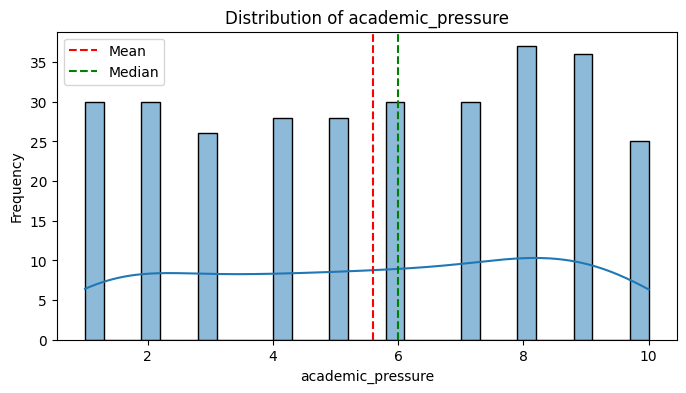

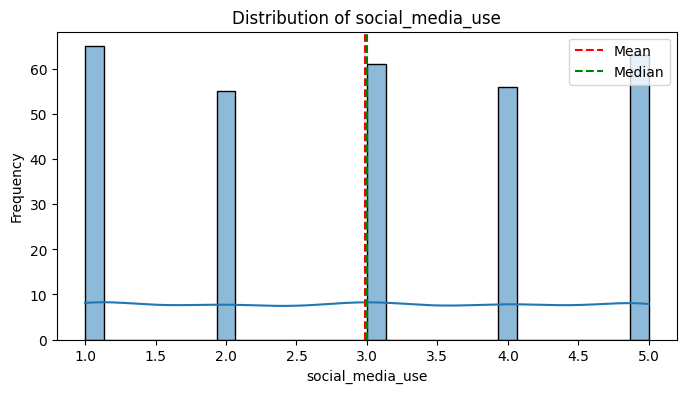

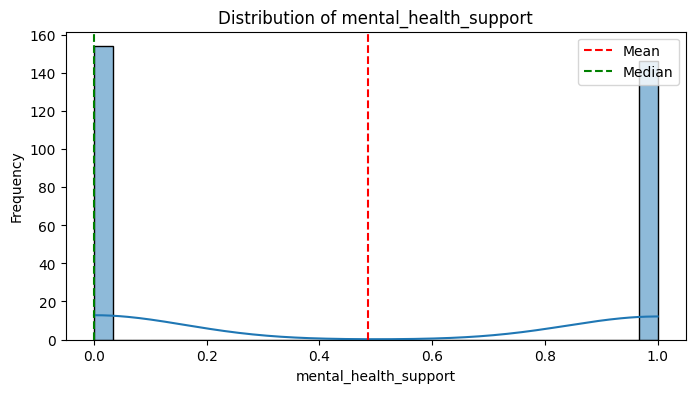

In [305]:
for column in dataset.columns[:-1]:
    plt.figure(figsize=(8, 4))
    sns.histplot(dataset[column], kde=True, bins=30)
    plt.axvline(mean_values[column], color='red', linestyle='--', label='Mean')
    plt.axvline(median_values[column], color='green', linestyle='--', label='Median')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# OneHotEncoder


In [306]:
from sklearn.compose import ColumnTransformer #To transform coumn values

from sklearn.preprocessing import OneHotEncoder #Onehot encoding

ct = ColumnTransformer(transformers= [('encoder',OneHotEncoder(), [1])], remainder='passthrough')

x = np.array(ct.fit_transform(x))

# Train-Test-Split

In [307]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

In [308]:
print(x_test[30])

[0.0 0.0 1.0 22 2.85 0 7 4 1 6.6 4.0 0 2 4 0]


# Feature Scaling

In [309]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Logistic Regression

In [310]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 20)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=20)

In [311]:
print(classifier.predict(sc.transform([[1.0, 0.0, 0.0, 1.0, 22, 2.85, 0, 7, 4, 1, 6.6, 4.0, 0, 2, 4]])))

[1]


# Predict

In [312]:
y_pred = classifier.predict(x_test)

In [313]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[30  0]
 [ 6 24]]


# Confusion Matrix

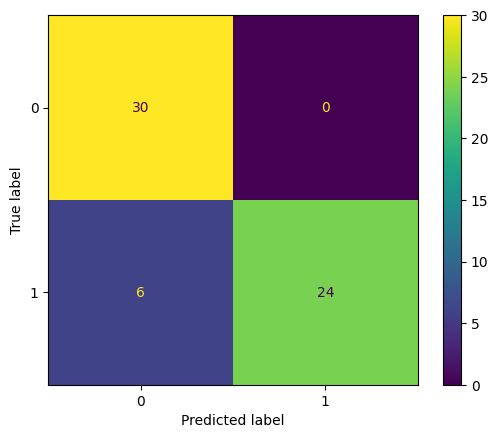

In [314]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred
)

# Accuracy score & F1 score

In [ ]:
accuracy_score(y_test, y_pred)

0.9

In [316]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)


0.8888888888888888

In [317]:
scaler = sc
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Neural Network Classifier

Epoch [5/1000], Loss: 0.6950
Epoch [10/1000], Loss: 0.6899
Epoch [15/1000], Loss: 0.6849
Epoch [20/1000], Loss: 0.6796
Epoch [25/1000], Loss: 0.6740
Epoch [30/1000], Loss: 0.6677
Epoch [35/1000], Loss: 0.6609
Epoch [40/1000], Loss: 0.6531
Epoch [45/1000], Loss: 0.6443
Epoch [50/1000], Loss: 0.6343
Epoch [55/1000], Loss: 0.6229
Epoch [60/1000], Loss: 0.6100
Epoch [65/1000], Loss: 0.5955
Epoch [70/1000], Loss: 0.5795
Epoch [75/1000], Loss: 0.5618
Epoch [80/1000], Loss: 0.5426
Epoch [85/1000], Loss: 0.5220
Epoch [90/1000], Loss: 0.5003
Epoch [95/1000], Loss: 0.4777
Epoch [100/1000], Loss: 0.4540
Epoch [105/1000], Loss: 0.4292
Epoch [110/1000], Loss: 0.4040
Epoch [115/1000], Loss: 0.3778
Epoch [120/1000], Loss: 0.3507
Epoch [125/1000], Loss: 0.3232
Epoch [130/1000], Loss: 0.2970
Epoch [135/1000], Loss: 0.2722
Epoch [140/1000], Loss: 0.2487
Epoch [145/1000], Loss: 0.2269
Epoch [150/1000], Loss: 0.2068
Epoch [155/1000], Loss: 0.1883
Epoch [160/1000], Loss: 0.1714
Epoch [165/1000], Loss: 0.15

<ipython-input-318-9d18ccd675d8>:69: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train_pca[y_train == j, 0], X_train_pca[y_train == j, 1],


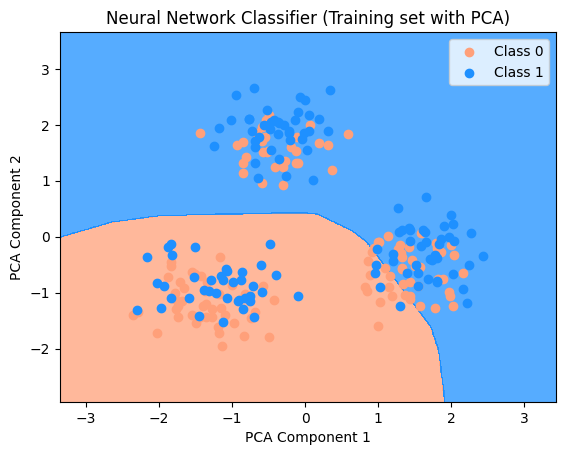

In [318]:
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
import torch
import torch.nn as nn
import torch.optim as optim


# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.LongTensor(y_train)

# Step 1: Create a feedforward neural network model
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)  # First hidden layer with 16 neurons
        self.fc2 = nn.Linear(16, 8)            # Second hidden layer with 8 neurons
        self.fc3 = nn.Linear(8, 2)             # Output layer with 2 classes

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Step 2: Instantiate the model, define loss function and optimizer
model = SimpleNN(input_size=X_train_tensor.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 3: Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Step 4: Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Step 5: Define the mesh grid for contour plotting
X1, X2 = np.meshgrid(np.arange(start=X_train_pca[:, 0].min() - 1, stop=X_train_pca[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_train_pca[:, 1].min() - 1, stop=X_train_pca[:, 1].max() + 1, step=0.01))

# Step 6: Get model predictions on the grid for plotting
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    grid_points = np.c_[X1.ravel(), X2.ravel()]
    grid_points_scaled = scaler.transform(pca.inverse_transform(grid_points))  # Inverse transform to original space
    grid_tensor = torch.FloatTensor(grid_points_scaled)
    Z = model(grid_tensor)
    Z = torch.argmax(Z, dim=1).numpy().reshape(X1.shape)

# Step 7: Plot decision boundary
cmap = ListedColormap(['lightsalmon', 'dodgerblue'])
plt.contourf(X1, X2, Z, alpha=0.75, cmap=cmap)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Step 8: Plot original points based on PCA-transformed features
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_train_pca[y_train == j, 0], X_train_pca[y_train == j, 1],
                c=cmap(i), label=f'Class {j}')

plt.title('Neural Network Classifier (Training set with PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


# Random Forest Classifier

<ipython-input-319-b8af06042dee>:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train_pca[y_train == j, 0], X_train_pca[y_train == j, 1],


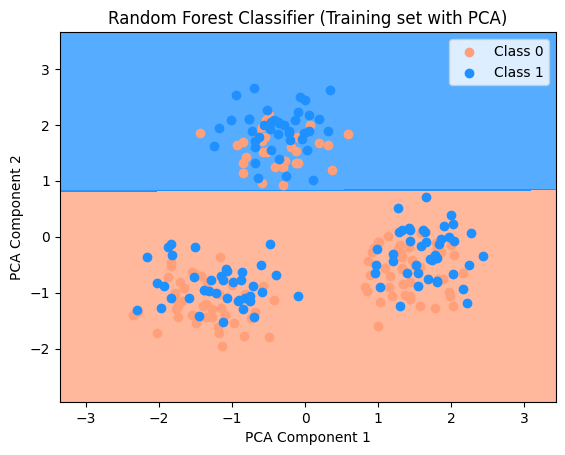

In [319]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA


# Train a Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_scaled, y_train)

# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Define the mesh grid for contour plotting
X1, X2 = np.meshgrid(np.arange(start=X_train_pca[:, 0].min() - 1, stop=X_train_pca[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_train_pca[:, 1].min() - 1, stop=X_train_pca[:, 1].max() + 1, step=0.01))

# Plot decision boundary
Z = classifier.predict(scaler.transform(pca.inverse_transform(np.c_[X1.ravel(), X2.ravel()])))
Z = Z.reshape(X1.shape)
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(['lightsalmon', 'dodgerblue']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot original points based on PCA-transformed features
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_train_pca[y_train == j, 0], X_train_pca[y_train == j, 1],
                c=ListedColormap(['lightsalmon', 'dodgerblue'])(i), label=f'Class {j}')

plt.title('Random Forest Classifier (Training set with PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


# SVM

<ipython-input-320-0f99dac05ef2>:35: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train_pca[y_train == j, 0], X_train_pca[y_train == j, 1],


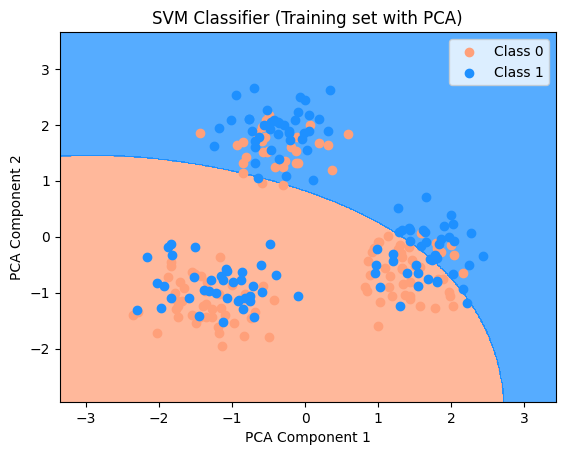

Best parameters from grid search: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [320]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA


# Step 1: Hyperparameter tuning using Grid Search for SVM
param_grid = {
      'C': [0.1, 1, 10, 100],
      'gamma': ['scale', 'auto', 0.01, 0.1, 1],
      'kernel': ['linear', 'rbf']
}
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Best estimator
classifier = grid_search.best_estimator_

# Step 2: Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Step 3: Define the mesh grid for contour plotting
X1, X2 = np.meshgrid(np.arange(start=X_train_pca[:, 0].min() - 1, stop=X_train_pca[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_train_pca[:, 1].min() - 1, stop=X_train_pca[:, 1].max() + 1, step=0.01))

# Step 4: Plot decision boundary
Z = classifier.predict(scaler.transform(pca.inverse_transform(np.c_[X1.ravel(), X2.ravel()])))
Z = Z.reshape(X1.shape)
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(['lightsalmon', 'dodgerblue']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Step 5: Plot original points based on PCA-transformed features
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_train_pca[y_train == j, 0], X_train_pca[y_train == j, 1],
                c=ListedColormap(['lightsalmon','dodgerblue'])(i), label=f'Class {j}')

plt.title('SVM Classifier (Training set with PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Display best parameters
print("Best parameters from grid search:", grid_search.best_params_)


# Relationship btw Mental illness and various Factors

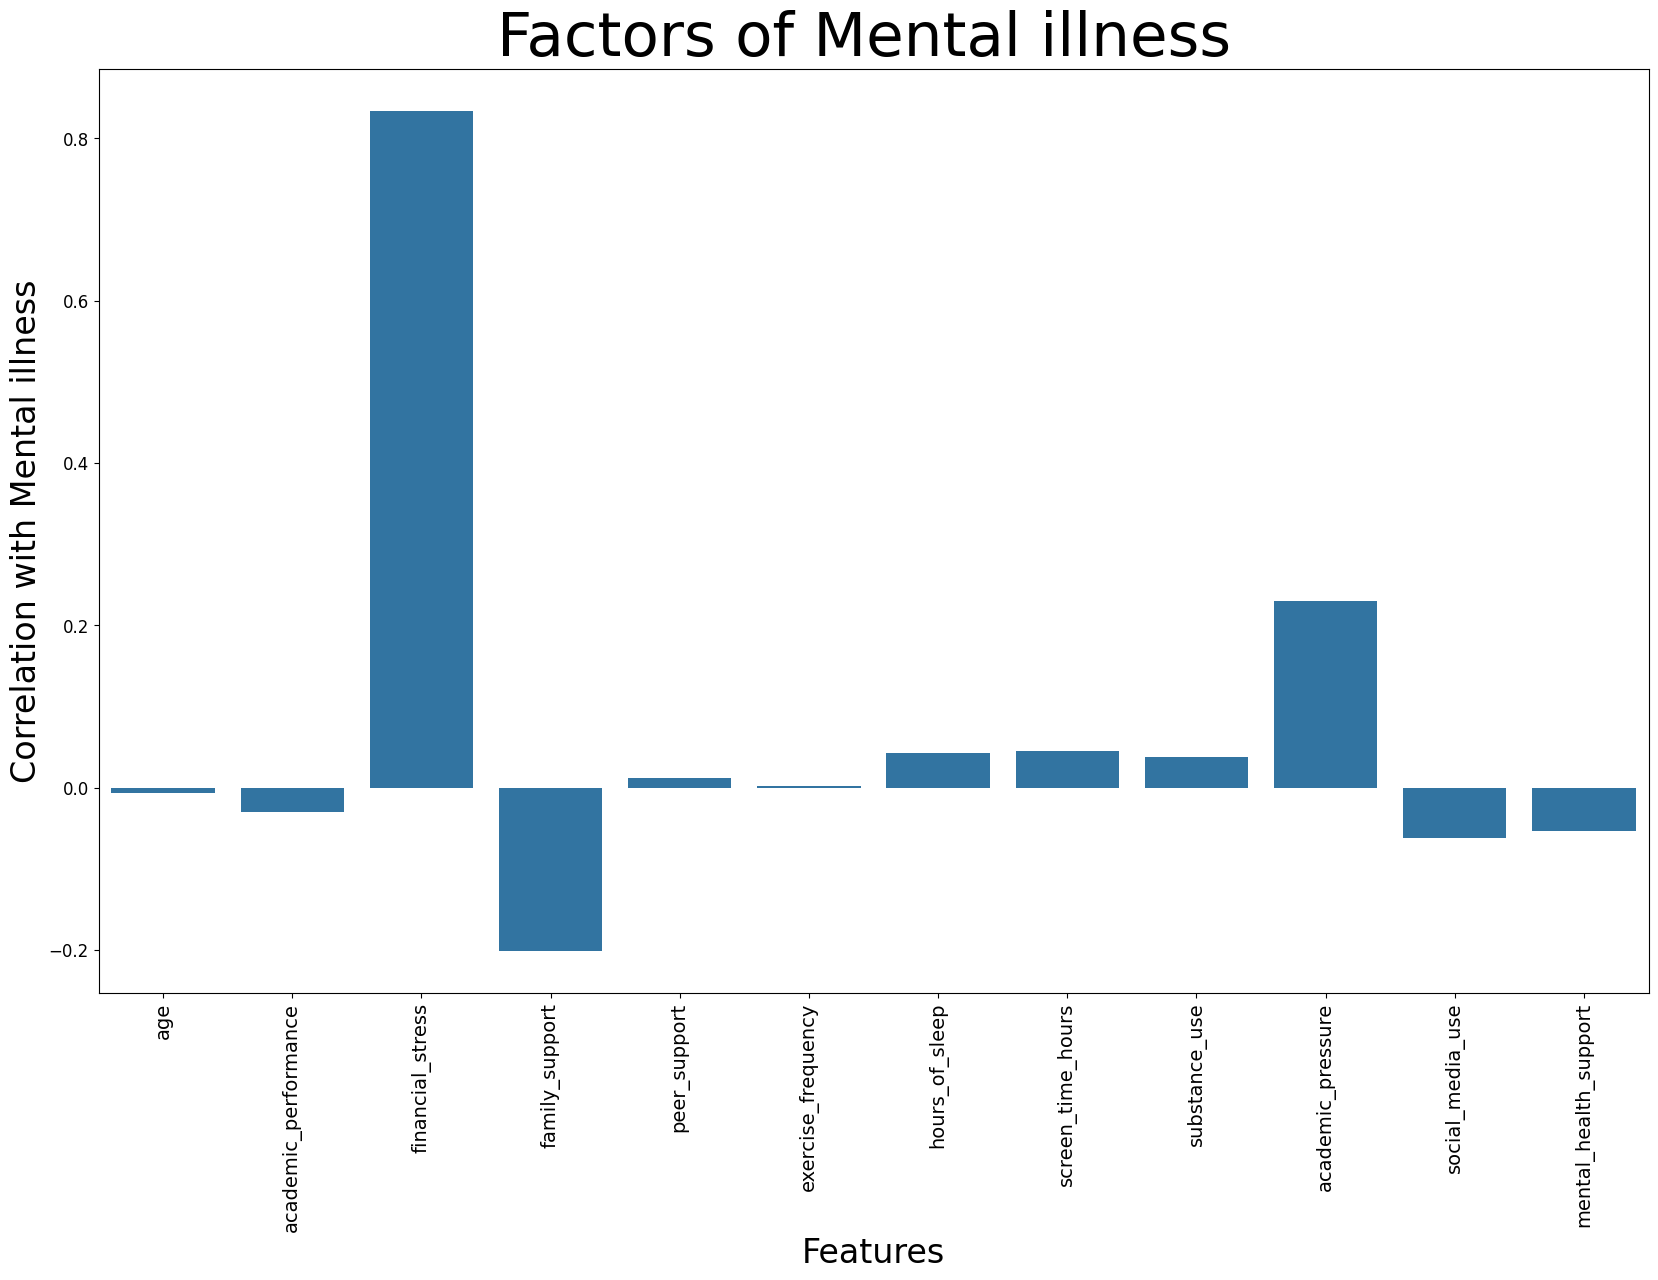

In [321]:
import seaborn as sns
z = dataset.corr()
z = z.iloc[-1,:-1]
plt.figure(figsize=(20, 12))
sns.barplot(z)
plt.title("Factors of Mental illness ",fontsize=44)
plt.xlabel("Features",fontsize=24)
plt.ylabel("Correlation with Mental illness",fontsize=24)
plt.yticks(fontsize=12)
plt.xticks(fontsize=14, rotation=90)
plt.show()